In [ ]:
import pandas as pd
"Download the data and open it in pandas"
!wget https://data.edd.ca.gov/api/views/e6gw-gvii/rows.csv?accessType=DOWNLOAD
!mv 'rows.csv?accessType=DOWNLOAD' data.csv

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv')
pd.set_option('expand_frame_repr', False)

In [ ]:
# set Date as datetype datetime (for sorting purpose)
df['Date'] = pd.to_datetime(df['Date'])

# Visualize the Unemployment rate for 60 different areas

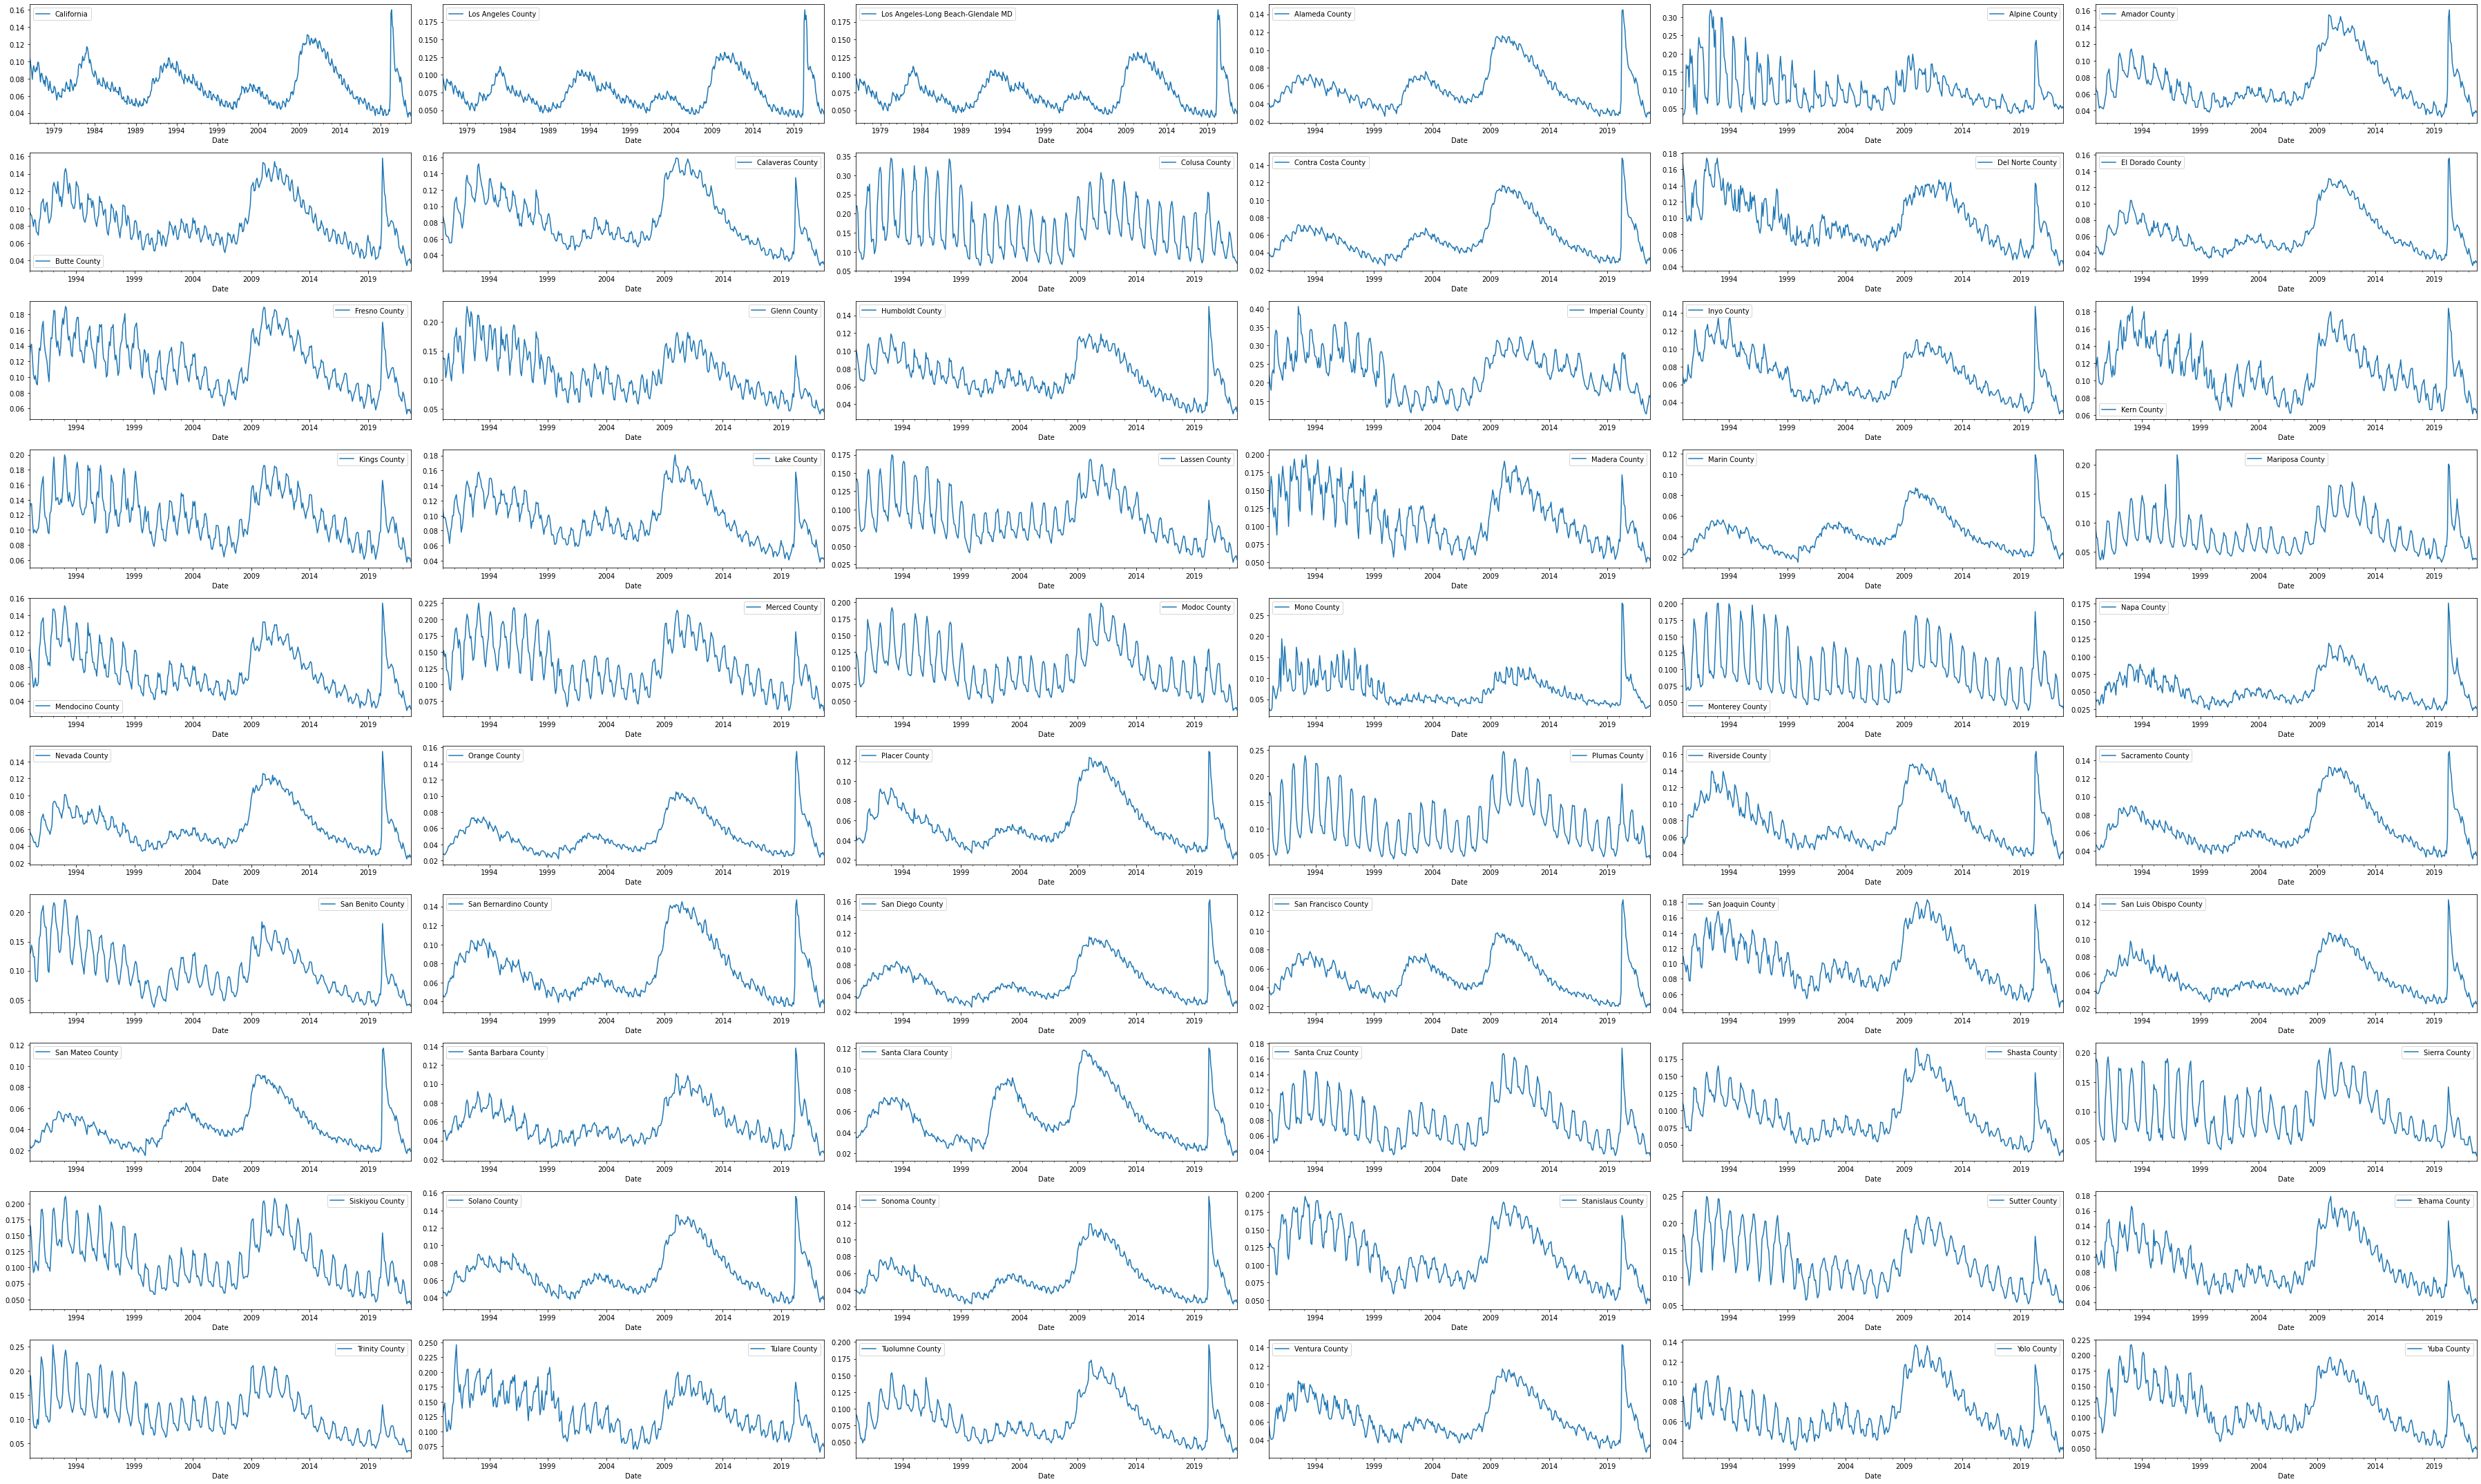

In [ ]:
areas = df["Area Name "].unique()
fig = plt.figure(figsize=(50,30))
# for i in range(len(areas)):
for i in range(60):
    t_df = df[(df["Area Name "] == areas[i]) & (df["Seasonally Adjusted (Y/N) "] == "N")]
    t_df = t_df.sort_values(by='Date')
    ax = fig.add_subplot(10,6,i+1)
    t_df.plot(x='Date', y='Unemployment Rate ', ax= ax, label=areas[i])
fig.tight_layout()
plt.show()

# Descriptive statistics for each area
You can check the descriptive statistics for area_names and area_type in [area_name_stat.txt](https://drive.google.com/file/d/1TSYgF4YNSjIez-SfV-YFrfZGcie7aj0m/view?usp=share_link) and [area_type_stat.txt](https://drive.google.com/file/d/1BfYVFCJYRfRWSnJryO8pJ8ezdBt_g-vR/view?usp=share_link) respectively.

In [ ]:
N_df = df[(df["Seasonally Adjusted (Y/N) "] == "N")]
areas = N_df["Area Name "].unique()
mean_dic = {}
std_dic = {}
max_dic = {}
min_dic = {}
date_dic = {}
for i in range(len(areas)):
    area = areas[i]
    t_df = df[(df["Area Name "] == area) & (df["Seasonally Adjusted (Y/N) "] == "N")]
    t_df = t_df.sort_values(by='Date')
    
    t_df = t_df[["Date" ,"Labor Force", "Employment ", "Unemployment ", 'Unemployment Rate ']]
    mean_df = t_df.mean(axis=0)
    std_df = t_df.std(axis=0)
    max_df = t_df.max(axis=0)
    min_df = t_df.min(axis=0)
    mean_dic[area] = [mean_df['Labor Force'], mean_df['Employment '], mean_df['Unemployment '], mean_df['Unemployment Rate ']]
    std_dic[area] = [std_df['Labor Force'], std_df['Employment '], std_df['Unemployment '], std_df['Unemployment Rate ']]
    max_dic[area] = [max_df['Labor Force'], max_df['Employment '], max_df['Unemployment '], max_df['Unemployment Rate ']]
    min_dic[area] = [min_df['Labor Force'], min_df['Employment '], min_df['Unemployment '], min_df['Unemployment Rate ']]
    date_dic[area] = [min_df['Date'], max_df["Date"]]

In [ ]:
for i in range(len(areas)):
# for i in range(len(areas)//2):
# for i in range(len(areas)//2, len(areas)):
    area = areas[i]
    print(f"{'-'*80}")
    print(f"{area}")
    print(f"{'-'*80}")
    print("Date: {} to {}".format(date_dic[area][0].strftime("%Y%m%d"), date_dic[area][1].strftime("%Y%m%d")))
    print("Labor Force:     mean: {:.2f}  std: {:.2f}, min: {}  max: {}".format(mean_dic[area][0], std_dic[area][0], min_dic[area][0], max_dic[area][0]))
    print("Employment:      mean: {:.2f}  std: {:.2f}, min: {}  max: {}".format(mean_dic[area][1], std_dic[area][1], min_dic[area][1], max_dic[area][1]))
    print("Unemployment:    mean: {:.2f}  std: {:.2f}, min: {}  max: {}".format(mean_dic[area][2], std_dic[area][2], min_dic[area][2], max_dic[area][2]))
    print("U-Rate:          mean: {:.4%}  std: {:.4f}  min: {:.4%}  max: {:.4%}".format(mean_dic[area][3], std_dic[area][3], min_dic[area][3], max_dic[area][3]))
    print(f"")